In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genomic-data-for-cancer/gene_expression.csv


##  Title:
#### "Genomic Data-Driven Insights for Cancer Prediction and Classification"

#### This study analyzes genomic data to predict and classify cancer using machine learning models. Various classifiers, including SVM, Random Forest, and Logistic Regression, are evaluated based on accuracy and F1 scores. The results provide insights into the effectiveness of different models in identifying cancer patterns from genetic features. 

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/genomic-data-for-cancer/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.tail()

,Gene One,Gene Two,Cancer Present
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0
2999,4.6,8.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [7]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [8]:
df.duplicated().sum()

862

In [9]:
df.corr

<bound method DataFrame.corr of       Gene One  Gene Two  Cancer Present
0          4.3       3.9               1
1          2.5       6.3               0
2          5.7       3.9               1
3          6.1       6.2               0
4          7.4       3.4               1
...        ...       ...             ...
2995       5.0       6.5               1
2996       3.4       6.6               0
2997       2.7       6.5               0
2998       3.3       5.6               0
2999       4.6       8.2               0

[3000 rows x 3 columns]>

In [10]:
df.dtypes

Gene One          float64
Gene Two          float64
Cancer Present      int64
dtype: object

In [11]:
df.shape

(3000, 3)

In [12]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

## Data visualizations

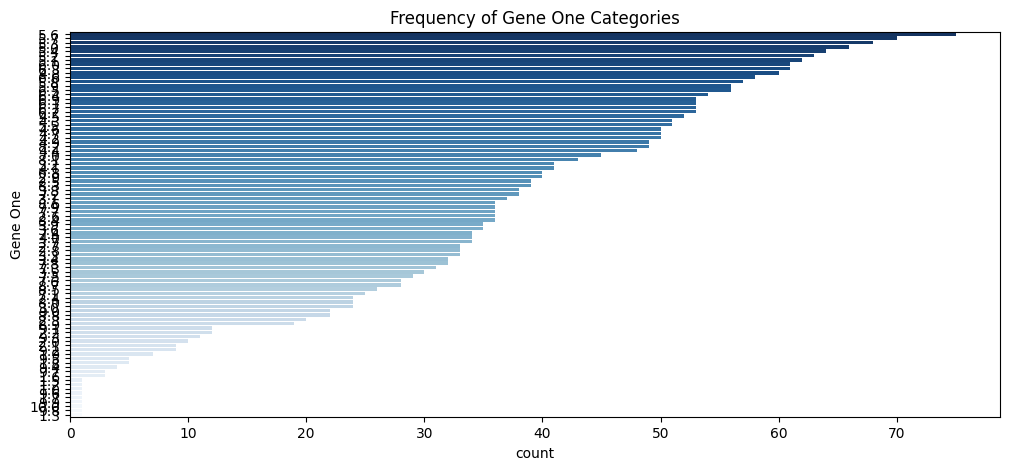

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['Gene One'], order=df['Gene One'].value_counts().index, palette='Blues_r')
plt.title('Frequency of Gene One Categories')
plt.show()

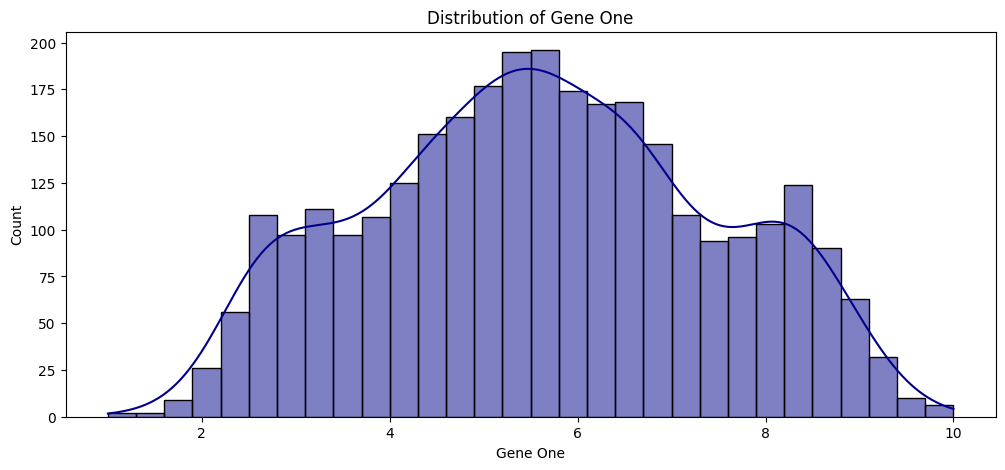

In [14]:
# Histogram (if numerical)
plt.figure(figsize=(12,5))
sns.histplot(df['Gene One'], kde=True, bins=30, color='darkblue')
plt.title('Distribution of Gene One')
plt.show()

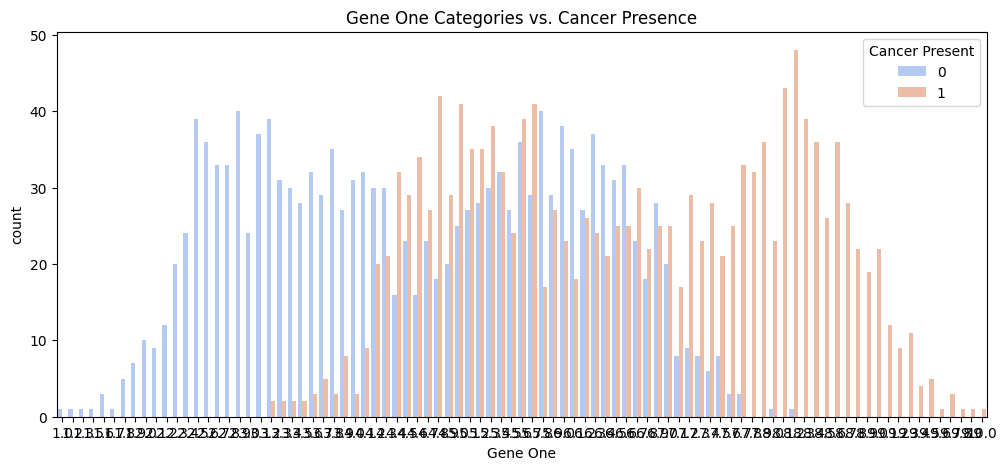

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Gene One'], hue=df['Cancer Present'], palette='coolwarm')
plt.title('Gene One Categories vs. Cancer Presence')
plt.show()

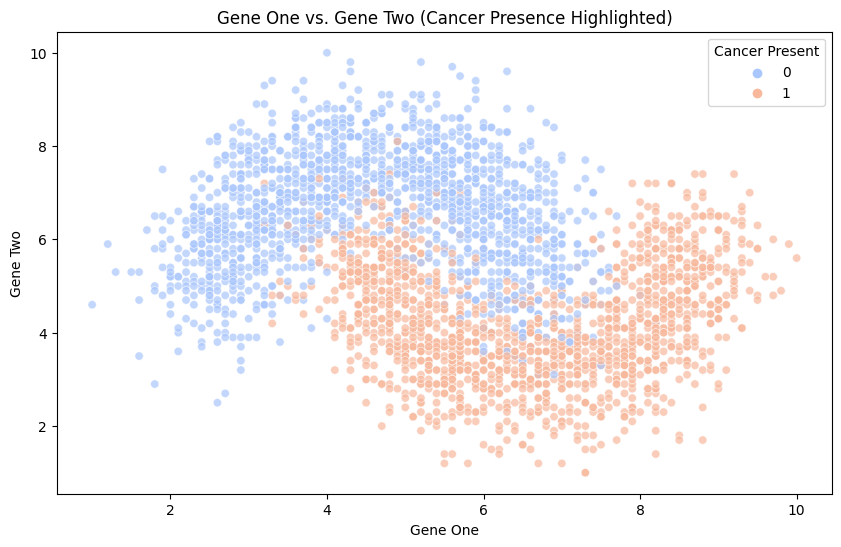

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Gene One'], y=df['Gene Two'], hue=df['Cancer Present'], palette='coolwarm', alpha=0.7)
plt.title('Gene One vs. Gene Two (Cancer Presence Highlighted)')
plt.show()

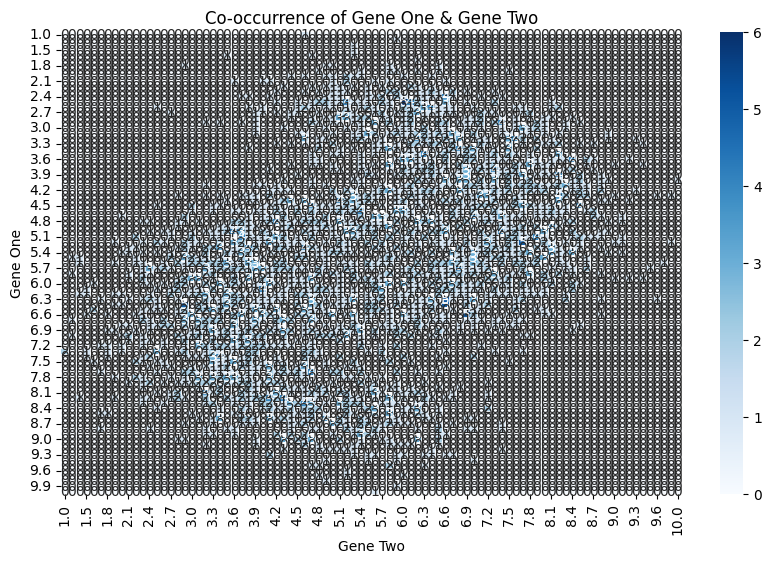

In [17]:
gene_crosstab = pd.crosstab(df['Gene One'], df['Gene Two'])
plt.figure(figsize=(10,6))
sns.heatmap(gene_crosstab, cmap='Blues', annot=True, fmt='d')
plt.title('Co-occurrence of Gene One & Gene Two')
plt.show()

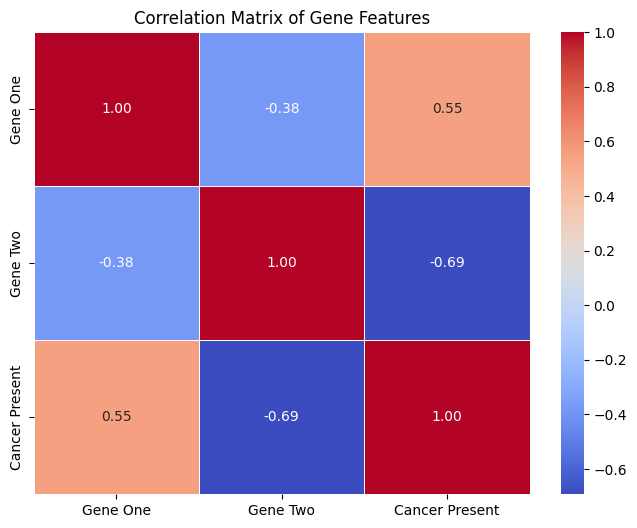

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Gene Features')
plt.show()

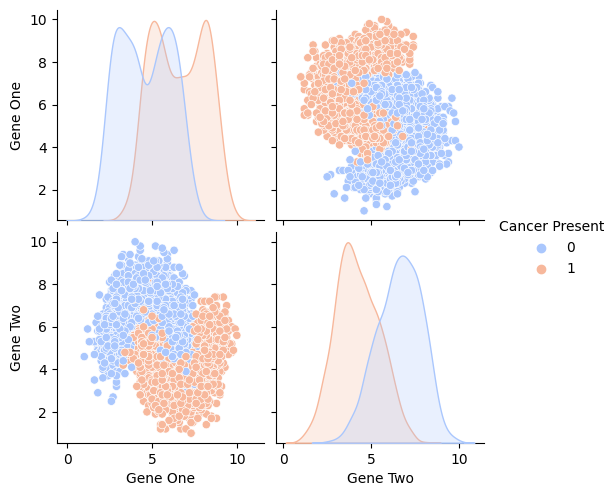

In [19]:
sns.pairplot(df, hue='Cancer Present', palette='coolwarm', diag_kind='kde')
plt.show()

## Predictive modeling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [22]:
print(df['Cancer Present'].isnull().sum())  # Should be 0

0


In [23]:
# Fix missing values in 'Cancer Present'
df['Cancer Present'].fillna(df['Cancer Present'].mode()[0], inplace=True)

In [24]:
# Encode categorical variables (if applicable)
le = LabelEncoder()
df['Gene One'] = le.fit_transform(df['Gene One'])
df['Gene Two'] = le.fit_transform(df['Gene Two'])

In [25]:
print(df.isnull().sum())  # Check missing values in each column

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64


In [26]:
# Splitting Data
X = df[['Gene One', 'Gene Two']]
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler# Standardize (only for models that need it)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Dictionary to store results
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    
    acc = accuracy_score(y_test, y_pred)  # Accuracy
    f1 = f1_score(y_test, y_pred, average="weighted")  # F1 Score
    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix

    results.append([name, acc, f1, cm])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Confusion Matrix"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Show results
print(results_df)

                 Model  Accuracy  F1 Score        Confusion Matrix
2                  SVM  0.945000  0.944953  [[314, 14], [19, 253]]
5                  KNN  0.918333  0.918320  [[304, 24], [25, 247]]
1        Random Forest  0.911667  0.911653  [[302, 26], [27, 245]]
4        Decision Tree  0.896667  0.896429  [[303, 25], [37, 235]]
0  Logistic Regression  0.848333  0.848570  [[276, 52], [39, 233]]
3          Naive Bayes  0.845000  0.845242  [[275, 53], [40, 232]]


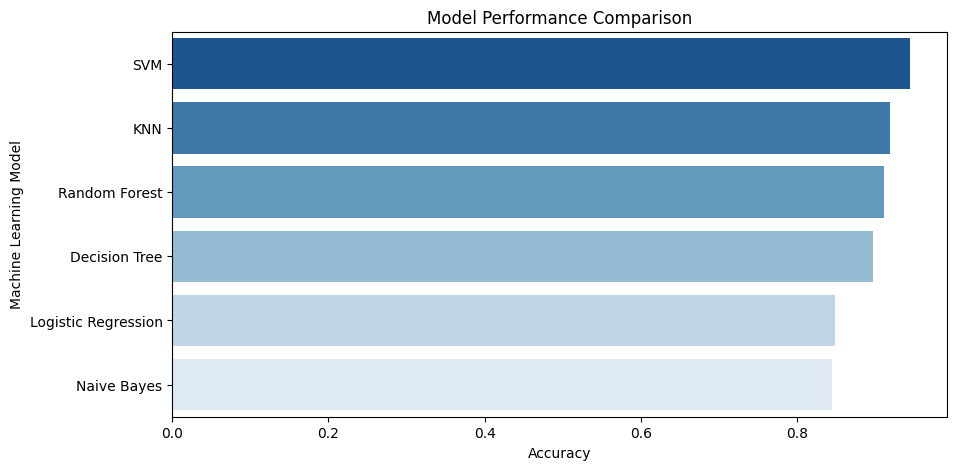

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=results_df['Accuracy'], y=results_df['Model'], palette='Blues_r')
plt.xlabel('Accuracy')
plt.ylabel('Machine Learning Model')
plt.title('Model Performance Comparison')
plt.show()

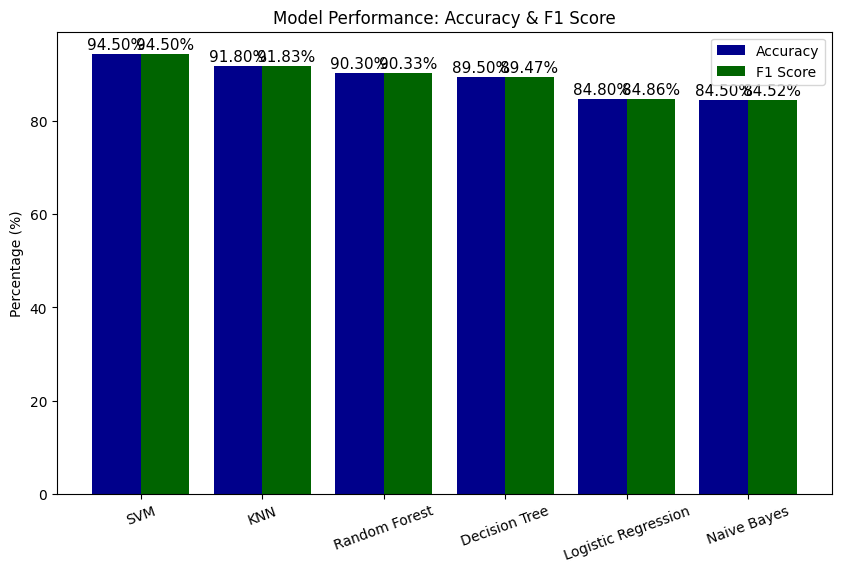

In [30]:
models = ["SVM", "KNN", "Random Forest", "Decision Tree", "Logistic Regression", "Naive Bayes"]
accuracy = [0.945, 0.918, 0.903, 0.895, 0.848, 0.845]
f1_scores = [0.944953, 0.918320, 0.903333, 0.894735, 0.848570, 0.845242]

x = np.arange(len(models))  # X-axis positions

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4

bars1 = ax.bar(x - bar_width/2, np.array(accuracy) * 100, bar_width, label="Accuracy", color="darkblue")
bars2 = ax.bar(x + bar_width/2, np.array(f1_scores) * 100, bar_width, label="F1 Score", color="darkgreen")

# Add percentage labels
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.2f}%", ha="center", fontsize=11, color="black")
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.2f}%", ha="center", fontsize=11, color="black")

# Labels & Titles
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylabel("Percentage (%)")
ax.set_title("Model Performance: Accuracy & F1 Score")
ax.legend()

plt.show()

## Thank you...pls upvote!!!